

Machine Learning – Project

Heart Disease Prediction

___

**Goal and objectives:** 
- Use a predictive model to classify patients who have heart failure, if given historical dataset with clinical parameters. 
- Evaluate the performance of the model 
- Suggest which features may be useful in heart failure prediction.


**Data Source: ** Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

**Features/Attribute Information**: Only 14 used
   
- 1. age: age in years -  **(numerical)**   
- 2. sex: sex (1 = male; 0 = female) - **(categorical)**    
- 3. cp: chest pain type - **(categorical)**  
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic       
- 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)  **(numerical)** 
- 5. chol: serum cholestoral in mg/dl **(numerical)**      
- 6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) - **(categorical)**  
- 7. restecg: resting electrocardiographic results - **(categorical)**  
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST  elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy  by Estes' criteria  
- 8. thalach: maximum heart rate achieved  **(numerical)**  
- 9. xhypo: (1 = yes; 0 = no)    - **(categorical)**  
- 10. ST depression induced by exercise relative to rest
- 11. slope: the slope of the peak exercise ST segment - **(categorical)**
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping     
- 12. ca: number of major vessels (0-3) colored by flourosopy  - **(categorical)**      
- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect  - **(categorical)** 
- 14. target : diagnosis of heart disease (angiographic disease status) presence of disease (values 1,2,3,4), absence (value  0).  - **(categorical)**
        

In [1]:
# import all libraries and tools


# EDA (exploratory data analysis) and visualisation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Models from TensorFlow - ANN (Deep Learning)
import tensorflow as tf
from tensorflow import keras


In [2]:
#Import dataset
#Set column heads appropriately

hd_data = pd.read_csv('processed.cleveland.csv', header= None)

col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
            'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']



hd_data.columns = col_names

hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


### **Data Clean up**

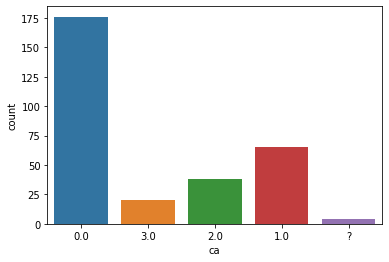

In [3]:
#Seems some columns have strings values (or missing values) in them
#Get and plot distinct values in 'ca'and 'thal'

sns.countplot(x = 'ca', data = hd_data)

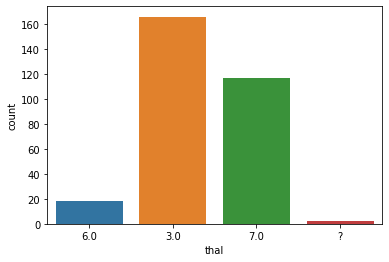

In [4]:
sns.countplot(x = 'thal', data = hd_data)

In [5]:
#Counts values for 'ca' and 'thal'

hd_data.thal.value_counts()
#hd_data.ca.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [6]:
#View rows with the '?' values

hd_data[hd_data['ca'] == '?']
#hd_data[hd_data['thal'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


#### How many distinct values in the 'target' column

In [7]:
hd_data.target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

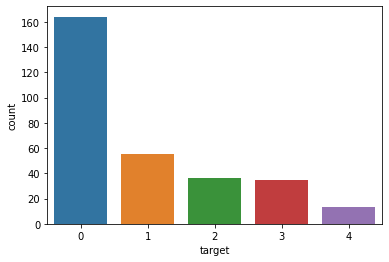

In [8]:
#Visualise

sns.countplot(x = 'target', data = hd_data)

 *Need the make the target column binary i.e heart disease present or not, '1' and '0' respectively

#### **Clean up tasks**
- Replace string values with NaN (Null values)
- Edit the target column to feature only two categories instead of six
    - Category '1' - presence of disease (values 1,2,3,4)
    - Category '0' - absence of disease (value 0). 

In [9]:
#Some values with '?' string which may indicate missing values
#replace '?' with NaN

hd_data = hd_data.replace('?', np.nan)

** *Missing values will be dealt with using Scikit-learn object later after the data is split into testing and training datasets.**

In [10]:
#Convert datatype from object to int as well as other categorical data 
 
hd_data[['ca', 'thal']] = hd_data[['ca', 'thal']].astype(float)

In [12]:
#Change target column to binary class 0 and 1: '0' >> absence of disease (value 0) and '1' >> presence of disease (values 1,2,3,4)

hd_data = hd_data.replace({'target': [2,3,4]}, 1)


In [13]:
# View the dataset

#hd_data.head()
#hd_data.tail(10)
hd_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## ** Some EDAs and Visualisation**
Before Training ML models

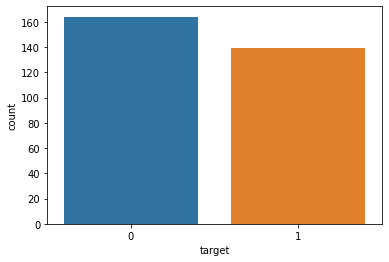

In [14]:
# Explore the data with plots

# How many class are there in the target now after clean up.

sns.countplot(x = 'target', data = hd_data)


In [15]:
hd_data.target.value_counts()

0    164
1    139
Name: target, dtype: int64

#### Distribution plots and correlation using heat map.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2b34f6150>,
      dtype=object)

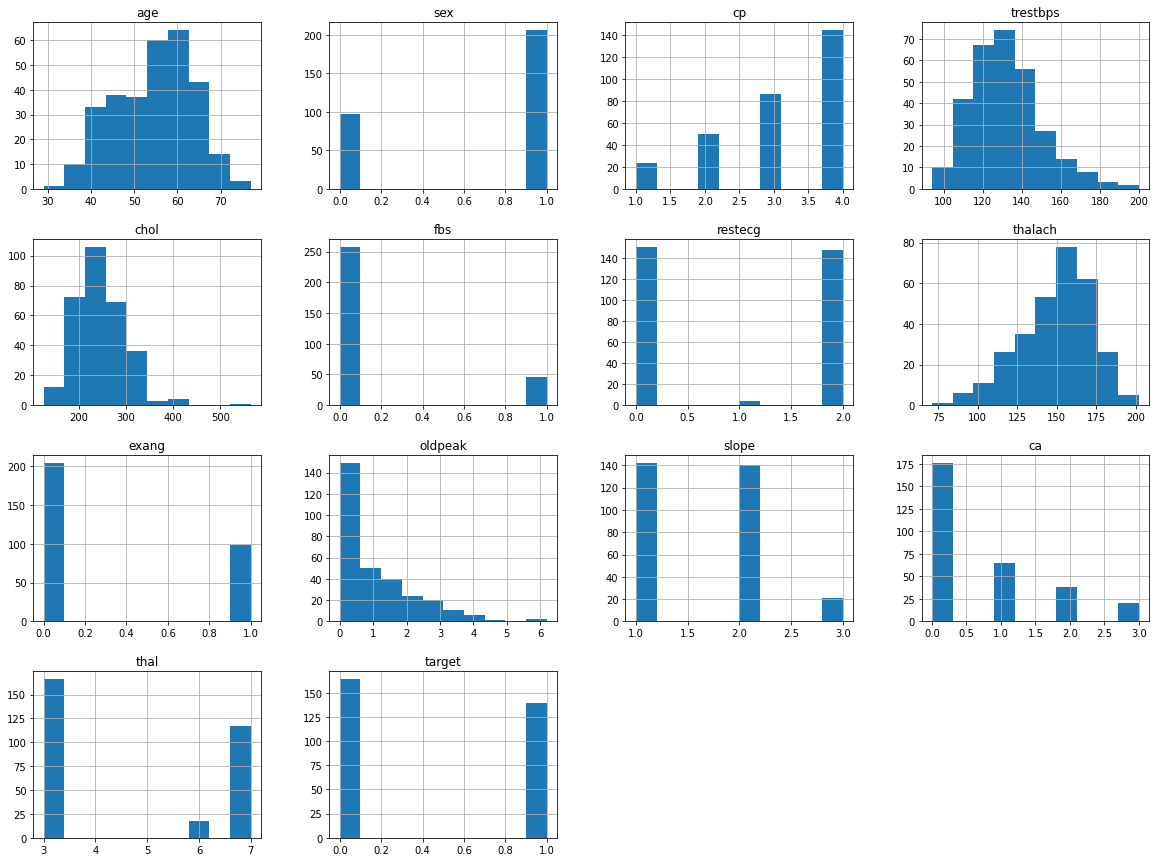

In [16]:
#sns.pairplot(hd_data, hue = 'target', vars = ['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

hd_data.hist( bins = 10, figsize =( 20,15))

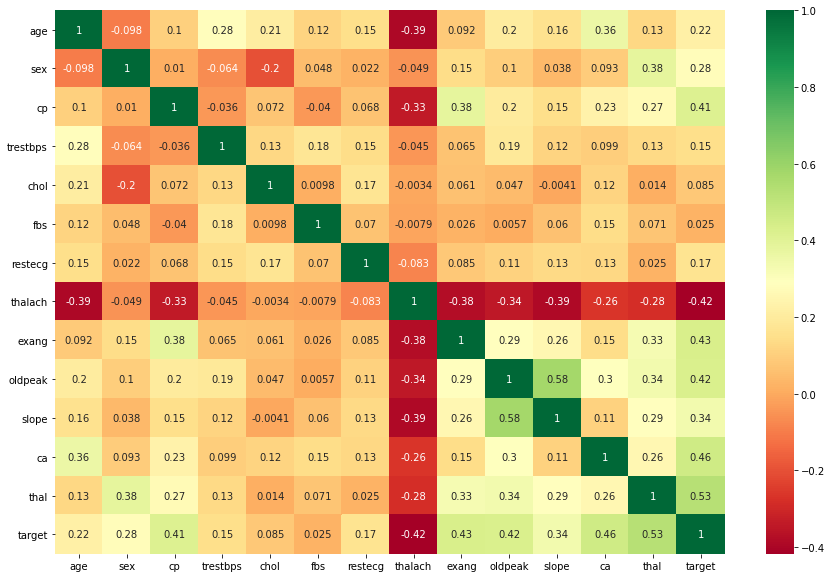

In [17]:
# Correlation matrix for the features

# More information on the feature importance will be provided after model trainings.

corrmat=hd_data.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(15,10)) 

#plot heat map 
g=sns.heatmap(hd_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Visualise how some features relate to the 'target' in order to understand the data more.


In [18]:
# Heart disease in relation to sex (male = 1, female = 0)

hd_data.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [19]:
# Compare target column with sex column

pd.crosstab(hd_data.target, hd_data.sex)

sex,0.0,1.0
target,,
0,72,92
1,25,114


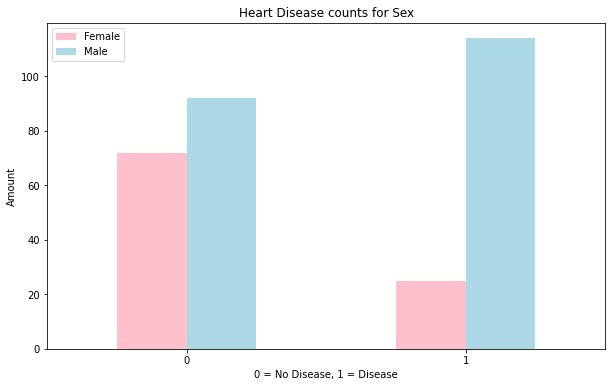

In [20]:
# Create a plot of crosstab

pd.crosstab(hd_data.target, hd_data.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["pink", "lightblue"])

plt.title("Heart Disease counts for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

**Heart Disease in relation Chest Pain Type** 

cp - chest pain type
- 1: Typical angina: chest pain related decrease blood supply to the heart
- 2: Atypical angina: chest pain not related to heart
- 3: Non-anginal pain: typically esophageal spasms (non heart related)
- 4: Asymptomatic: chest pain not showing signs of disease

In [21]:
pd.crosstab(hd_data.cp, hd_data.target)

target,0,1
cp,,
1.0,16,7
2.0,41,9
3.0,68,18
4.0,39,105


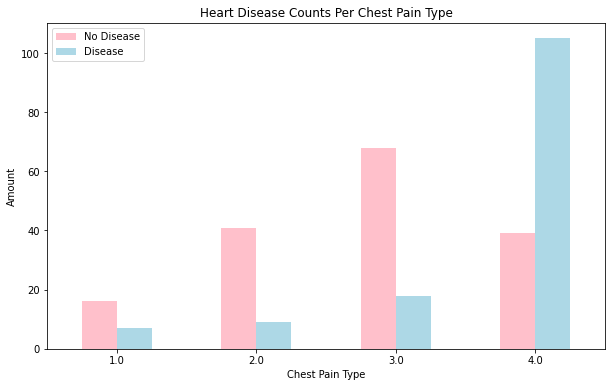

In [22]:
# crosstab for more visual
pd.crosstab(hd_data.cp, hd_data.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["pink", "lightblue"])

# Add some communication
plt.title("Heart Disease Counts Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

Chest Pain Type 4: 

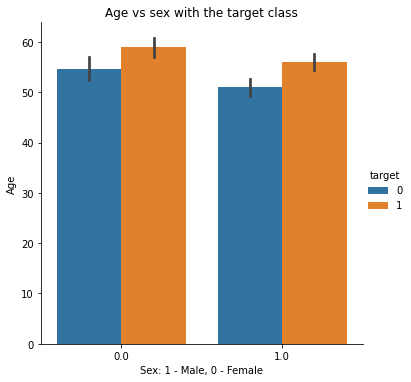

In [23]:
#plot age vs sex with respect to the target
sns.catplot(kind = 'bar', data = hd_data, y = 'age', x = 'sex', hue = 'target')
                                   
plt.title('Age vs sex with the target class')
plt.xlabel("Sex: 1 - Male, 0 - Female")
plt.ylabel("Age")
plt.xticks(rotation=0);
plt.show()

### **Split Data into Training and testing Set**

In [24]:
y = hd_data['target']
X = hd_data.drop(['target'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [26]:
X_train.isnull().mean()

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.016529
thal        0.004132
dtype: float64

##### **Deal with missing data**

In [28]:
#Deal with missing data using Scikit-learn objects
#use most frequent category

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
# Now we impute the missing values with SimpleImputer
# cols = ['ca', 'thal']
# create an instance of the simple imputer
# we indicate that we want to impute with the 
# most frequent category

imputer = SimpleImputer(strategy='most_frequent')

# fit the imputer to the train set

imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [30]:
#Quick look at the learnt frequent values like this:
imputer.statistics_

array([ 57.,   1.,   4., 120., 197.,   0.,   0., 163.,   0.,   0.,   2.,
         0.,   3.])

In [31]:
# and now we impute the train and test set

#data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[35.,  0.,  4., ...,  1.,  0.,  3.],
       [47.,  1.,  3., ...,  1.,  0.,  3.],
       [56.,  1.,  4., ...,  3.,  0.,  7.],
       ...,
       [44.,  1.,  4., ...,  1.,  1.,  3.],
       [40.,  1.,  1., ...,  1.,  0.,  7.],
       [71.,  0.,  2., ...,  1.,  2.,  3.]])

In [32]:
# encode the train set back to a dataframe:

col_names.remove('target')

pd.DataFrame(X_train, columns=col_names).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0
1,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0
2,56.0,1.0,4.0,130.0,283.0,1.0,2.0,103.0,1.0,1.6,3.0,0.0,7.0
3,45.0,1.0,4.0,115.0,260.0,0.0,2.0,185.0,0.0,0.0,1.0,0.0,3.0
4,63.0,0.0,2.0,140.0,195.0,0.0,0.0,179.0,0.0,0.0,1.0,2.0,3.0


In [33]:
X_train


array([[35.,  0.,  4., ...,  1.,  0.,  3.],
       [47.,  1.,  3., ...,  1.,  0.,  3.],
       [56.,  1.,  4., ...,  3.,  0.,  7.],
       ...,
       [44.,  1.,  4., ...,  1.,  1.,  3.],
       [40.,  1.,  1., ...,  1.,  0.,  7.],
       [71.,  0.,  2., ...,  1.,  2.,  3.]])

### **Build, Train and Test Models**

- **Model01** = Random Forest Classifier 
- **Model02** = Logistic Regression

*ANN -  Deep learning is a good option but the data set is too small for a reasonable deep learning model

#### **RandomForest Classifier Model**

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [35]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1200, num = 20)]
print(n_estimators)

[10, 72, 135, 197, 260, 323, 385, 448, 511, 573, 636, 698, 761, 824, 886, 949, 1012, 1074, 1137, 1200]


In [36]:
##Hyperparameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 20, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = np.arange(2, 20, 2)
# Minimum number of samples required at each leaf node
min_samples_leaf = np.arange(1, 20, 2)

In [37]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


print(random_grid)

{'n_estimators': [10, 72, 135, 197, 260, 323, 385, 448, 511, 573, 636, 698, 761, 824, 886, 949, 1012, 1074, 1137, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 8, 14, 20, None], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_model = RandomForestClassifier()

In [39]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions= random_grid, n_iter=20,
                         cv = 5, verbose=2, n_jobs = 1)

In [40]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None, total=   0.3s
[CV] n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None, total=   0.3s
[CV] n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None 
[CV]  n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None, total=   0.3s
[CV] n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None 
[CV]  n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None, total=   0.3s
[CV] n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None 
[CV]  n_estimators=197, min_samples_split=10, min_samples_leaf=13, max_features=auto, max_depth=None, total=   0.3s
[CV] n_estimators=10, min_samples_split=14, min_samples_leaf=15, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=14, min_samples_leaf=15, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [41]:
rf_random.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 1074}

In [42]:
print (f'Train Accuracy - : {rf_random.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_random.score(X_test,y_test):.3f}')

Train Accuracy - : 0.880
Test Accuracy - : 0.902


In [43]:
#save model01

import pickle
# open a file, where you ant to store the data
file = open('model01.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

#### **Model 02: Logistic Regression** 

In [44]:
# base model before tuning hyperparameters

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print (f'Train Accuracy - : {lr.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {lr.score(X_test,y_test):.3f}')

Train Accuracy - : 0.847
Test Accuracy - : 0.869


In [46]:
# Create a hyperparameter grid for LogisticRegression
lr_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [47]:
# Setup random hyperparameter search for LogisticRegression
rs_lr_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

In [48]:
rs_lr_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [49]:
rs_lr_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [50]:
print (f'Train Accuracy - : {rs_lr_reg.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rs_lr_reg.score(X_test,y_test):.3f}')

Train Accuracy - : 0.843
Test Accuracy - : 0.869


### **Model Evaluation**

- Accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report



### **Accuracy**

In [51]:
#Accuracy on test data for both models

print (f'Random Forest Classifier Accuracy on test dataset- : {rf_random.score(X_test,y_test):.3f}')
print (f'Logistic Regression Accuracy on test dataset- : {rs_lr_reg.score(X_test,y_test):.3f}')

Random Forest Classifier Accuracy on test dataset- : 0.902
Logistic Regression Accuracy on test dataset- : 0.869


 The **Random Forest Model** has a better accuracy (90.2%) 
 
 We will now explore other evaluation parameters on the Random Forest Model

In [52]:
rf_random.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 1074}

In [53]:
# Make predictions with the model
y_preds = rf_random.predict(X_test)

In [54]:
y_preds

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [55]:
y_test

112    0
292    1
125    0
93     0
231    1
      ..
61     0
173    0
115    0
13     0
208    0
Name: target, Length: 61, dtype: int64

**ROC curve and AUC score**

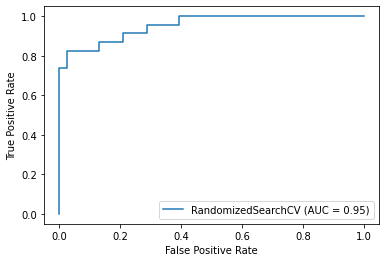

In [56]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(rf_random, X_test, y_test)

**AUC = 0.94**

### **Confusion Matrix**

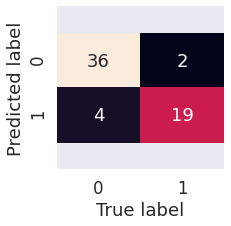

In [57]:
#Use a function to present a tidy plot

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

### **Classification Report**

In [58]:

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.90      0.83      0.86        23

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.89        61
weighted avg       0.90      0.90      0.90        61



**Cross Validation** could be used on the metrics to improve the model evaluation 

### **Feature Importance**
We will investigate the feature importance using the two models. 

In [59]:
# Feature Importance : RandomForest Classifier model

# Use best parameters from the Model training

rs_lr_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [60]:
# Create a new classifier with best parameters
#fit to training set

log = LogisticRegression(solver= 'liblinear', C=  0.08858667904100823)

log.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
#Get coeffs

log.coef_

array([[-0.03429285,  0.33202136,  0.36854623,  0.01742132,  0.00292448,
        -0.10181736,  0.18790965, -0.03514772,  0.33387521,  0.22895927,
         0.09487139,  0.69225929,  0.33178591]])

In [62]:
# Match coeff's of features to columns
features = dict(zip(hd_data.columns, list(log.coef_[0])))
features

{'age': -0.03429285416994057,
 'ca': 0.6922592915516717,
 'chol': 0.00292447619214354,
 'cp': 0.3685462343577038,
 'exang': 0.3338752142827483,
 'fbs': -0.10181736107104442,
 'oldpeak': 0.22895926883065576,
 'restecg': 0.18790964781427671,
 'sex': 0.3320213557445031,
 'slope': 0.09487138895334002,
 'thal': 0.3317859111646087,
 'thalach': -0.035147724022534535,
 'trestbps': 0.017421324550620808}

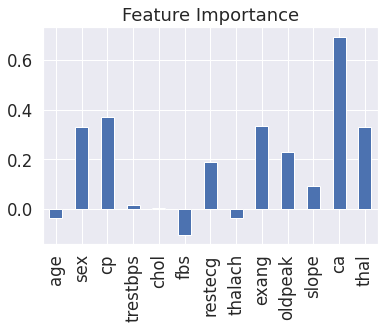

In [63]:
# Visualize feature importance
feature_df = pd.DataFrame(features, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [64]:

# Feature Importance : RandomForest Classifier model

# Use best parameters from the Model training

# Create a new classifier with best parameters


rf = RandomForestClassifier(n_estimators = 1074,
                            min_samples_split= 10,
                            min_samples_leaf= 7,
                            max_features= 'auto',
                            max_depth= None)



rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1074,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

-----
-----

------

In [65]:
# feature Importance

print(rf.feature_importances_)

[0.05242406 0.03696645 0.13774292 0.03850569 0.03836825 0.00139735
 0.01411101 0.12769853 0.0695656  0.0881117  0.06079336 0.1656218
 0.16869327]


____

-----

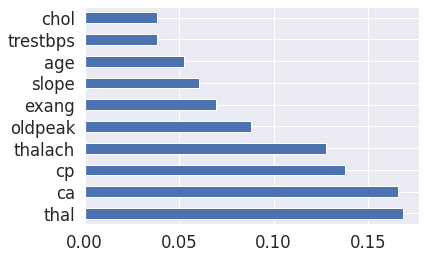

In [66]:
#plot graph of feature importances for better visualization

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### **Top three important features**
Top three important features (based on the two models)
- **'thal'** *thalium stress result*
- **'ca'**: *number of major vessels (0-3) colored by flourosopy*
- **'oldpeak'**: *ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more*

*Strange to see that 'sex' only appears as an important feature in the Logistic regression Model.

### **Essemble learning** 
using logistic Regression and Random Forest Classifier as an improve predictive model 

In [68]:
#Create and train a voting clasifier 

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression
 

In [69]:
ensemble = VotingClassifier(estimators=[('rf', rf), ('lr', log )], voting = 'hard')


In [70]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ensemble, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [71]:
n_scores

array([0.76      , 0.92      , 0.79166667, 0.875     , 0.79166667,
       0.83333333, 0.79166667, 0.83333333, 0.91666667, 0.75      ,
       0.72      , 0.88      , 0.91666667, 0.83333333, 0.70833333,
       0.91666667, 0.75      , 0.91666667, 0.875     , 0.70833333,
       0.96      , 0.92      , 0.79166667, 0.66666667, 0.83333333,
       0.83333333, 0.79166667, 0.79166667, 0.66666667, 0.95833333])

In [72]:
n_scores.mean()

0.823388888888889

In [73]:
# Evaluate the Voting Classifier model
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=7,
                                                     min_samples_split=10,
                                                     min_weight_fraction_leaf=0.0,
       

In [74]:
ensemble.score(X_test,y_test)

0.9016393442622951

In [75]:
y_pred = ensemble.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        38
           1       1.00      0.74      0.85        23

    accuracy                           0.90        61
   macro avg       0.93      0.87      0.89        61
weighted avg       0.92      0.90      0.90        61



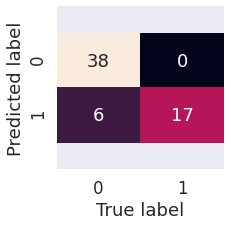

In [77]:
#confusion matrix

plot_conf_mat(y_test, y_pred)

In [79]:
file = open('model_ensemble.pkl', 'wb')

# dump information to that file
pickle.dump(ensemble, file)